In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data

In [2]:
#get data from twitter-archive-enhanced.csv
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#import the Requests library 
import requests
import os

In [4]:
#download image_predictions.tsv programmatically 
folder_name = 'image_predictions'
if not os.path.exists(folder_name) :
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
#get data from image-predictions.tsv
image_predict = pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
#Use Python's tweepy library
import tweepy

In [9]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [10]:
#query the Twitter API for each tweet's JSON data
tweet_ids = list(df.tweet_id)

twitter_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,tweet_mode='extended')
                                      
        twitter_data[str(tweet)] = tweet_status._json
    except: 
        print("Error in tweet: " + str(tweet))

Error in tweet: 888202515573088257
Error in tweet: 873697596434513921
Error in tweet: 872668790621863937
Error in tweet: 869988702071779329
Error in tweet: 866816280283807744
Error in tweet: 861769973181624320
Error in tweet: 845459076796616705
Error in tweet: 842892208864923648
Error in tweet: 837012587749474308
Error in tweet: 827228250799742977
Error in tweet: 802247111496568832
Error in tweet: 775096608509886464
Error in tweet: 770743923962707968
Rate limit reached. Sleeping for: 741
Error in tweet: 754011816964026368
Rate limit reached. Sleeping for: 742


In [11]:
#import json library and write json data to text file 
import json

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(twitter_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [12]:
#read text file line by line 
tweet_df = pd.read_json('tweet_json.txt',orient='index')

In [13]:
tweet_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2544,0,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,NaN,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,129,0,This is a western brown Mitsubishi terrier. Up...,NaN,...,NaN,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,Here is a very happy pup. Big fan of well-main...,NaN,...,NaN,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,296,0,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,NaN,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,107,0,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,NaN,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."


## Assessing Data


In [14]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
#investigate df table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
#investigate image_predict table
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
tweet_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2544,0,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,NaN,NaN,NaN,NaN,508,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,129,0,This is a western brown Mitsubishi terrier. Up...,NaN,...,NaN,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"[0, 130]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,Here is a very happy pup. Big fan of well-main...,NaN,...,NaN,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"[0, 137]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,296,0,This is a purebred Piers Morgan. Loves to Netf...,NaN,...,NaN,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"[0, 120]","{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,107,0,Here we have a 1949 1st generation vulpix. Enj...,NaN,...,NaN,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",0,"{'contributors_enabled': False, 'created_at': ..."


In [19]:
#investigate tweet_df table 
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
full_text                        2342 non-null object
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              

### Quality Issues:
    
#### Df Table:
- Remove retweeted rows
- Change incorrect dog names ('a','an',and 'the') to 'None' 
- Convert 'tweet_id' from int to str type
- Convert 'timestamp' from object to datetime 

#### Image_predict Table:
- Capitalize the first letter of each word in p1,p2,p3 columns
- Remove the "_"  between words in p1,p2,p3 columns
- Convert 'tweet_id' from int to str type

#### Tweet_df Table:

- Remove retweeted rows
- Rename "id" to "tweet_id' to match with other tables
- Convert 'tweet_id' from int to str type

### Tidiness issue

- Combine 'doggo', 'floofer', 'pupper', and 'puppo' to one 'stage' column
- Merge df, image_predict and tweet_df tables with 'tweet_id' column
- Drop unuseful columns for each table


## Cleaning Data

### Df Table

In [49]:
#make a copy of original df table 
df_clean = df.copy()

#### Define

Remove retweeted rows. Only keep the original ones

#### Code

In [50]:
#only select rows with null retweeted_status_id 
df2_clean = df_clean[df_clean['retweeted_status_id'].isnull()]
df2_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Test

In [51]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define

Combine 'doggo', 'floofer', 'pupper', and 'puppo' to one 'stage' column

#### Code

In [52]:
#replace None to a space value for doggo, floofer, pupper, and puppo columns
df2_clean_doggo = df2_clean['doggo'].replace('None', '')
df2_clean_floofer = df2_clean['floofer'].replace('None', '')
df2_clean_pupper = df2_clean['pupper'].replace('None', '')
df2_clean_puppo = df2_clean['puppo'].replace('None', '')

#Concatenate strings from each column to the 'stage' column 
df2_clean['stage'] = df2_clean_doggo.str.cat(df2_clean_floofer).str.cat(df2_clean_pupper).str.cat(df2_clean_puppo)

#Drop four columns and replace space with NaN
df_final= df2_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)
df_final['stage']=df_final['stage'].replace('', np.nan)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [53]:
#ignore doggopupper, doggofloofer, and doggopuppo since the amount is small
df_final['stage'].value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

#### Define

Change incorrect dog names ('a','an',and 'the') to 'None'

#### Code

In [54]:
#change "a", the , an to None  
df_final['name'].replace('a','None',inplace = True)
df_final['name'].replace('an','None',inplace = True)
df_final['name'].replace('the','None', inplace = True)

#### Test

In [55]:
df_final['name'].value_counts().head(10)

None       749
Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Lola         8
Name: name, dtype: int64

#### Define

Convert 'tweet_id' from int to str type and'timestamp' from object to datetime

#### Code

In [56]:
df_final.tweet_id = df_final.tweet_id.astype(str)
df_final['timestamp'] = pd.to_datetime(df_final['timestamp'])

#### Test

In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         344 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 254.9+ KB


#### Define

Drop columns that are not important for the analysis 

#### Code

In [58]:
df_final.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','text'],axis=1,inplace =True)


#### Test

In [59]:
df_final.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Franklin,NaN


### Image_predict Table

In [31]:
image_predict_clean = image_predict.copy()

#### Define

Remove the "_" between words in p1,p2,p3 columns

#### Code

In [32]:
image_predict_clean['p1']= image_predict_clean['p1'].str.replace('_',' ')
image_predict_clean['p2']= image_predict_clean['p2'].str.replace('_',' ')
image_predict_clean['p3']= image_predict_clean['p3'].str.replace('_',' ')

#### Test

In [33]:
image_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Capitalize the first letter of each word in p1,p2,p3 columns

#### Code

In [34]:
image_predict_clean['p1'] = image_predict_clean['p1'].str.title()
image_predict_clean['p2'] = image_predict_clean['p2'].str.title()
image_predict_clean['p3'] = image_predict_clean['p3'].str.title()

#### Test

In [36]:
image_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Convert 'tweet_id' from int to str type

In [37]:
image_predict_clean.tweet_id = image_predict_clean.tweet_id.astype(str)

#### Test

In [38]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tweet_df Table

In [39]:
#make a copy of the tweet_df table
tweet_df_clean = tweet_df.copy()

#### Define

Rename "id" to "tweet_id' to match with other tables and convert it from int to str type

#### Code

In [40]:
tweet_df_clean['tweet_id']= tweet_df_clean['id'].astype(str)

#### Test

In [41]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2342 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 33 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null int64
full_text                        2342 non-null object
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              

#### Define

Remove retweeted rows

#### Code

In [42]:
tweet_df_clean= tweet_df_clean[tweet_df_clean.retweeted_status.isnull()]

#### Test

In [43]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 33 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
display_text_range               2174 non-null object
entities                         2174 non-null object
extended_entities                1993 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null int64
full_text                        2174 non-null object
geo                              0 non-null float64
id                               2174 non-null int64
id_str                           2174 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              

#### Define

Drop columns that are not important for the analysis

#### Code

In [44]:
# revise drop columns before doing visualization
tweet_df_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'display_text_range',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id', 
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'quoted_status_permalink',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)

#### Test

In [45]:
tweet_df_clean.head()

,favorite_count,full_text,retweet_count,tweet_id
1991-02-08 13:48:08.022790149,2544,Here we have a Japanese Irish Setter. Lost eye...,508,666020888022790144
1991-02-08 16:08:05.002620928,129,This is a western brown Mitsubishi terrier. Up...,47,666029285002620928
1991-02-08 17:16:52.701032449,125,Here is a very happy pup. Big fan of well-main...,44,666033412701032448
1991-02-08 20:17:06.329800704,296,This is a purebred Piers Morgan. Loves to Netf...,139,666044226329800704
1991-02-08 21:40:48.165822465,107,Here we have a 1949 1st generation vulpix. Enj...,40,666049248165822464


In [46]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 4 columns):
favorite_count    2174 non-null int64
full_text         2174 non-null object
retweet_count     2174 non-null int64
tweet_id          2174 non-null object
dtypes: int64(2), object(2)
memory usage: 84.9+ KB


### Merge Tables

In [60]:
##combine three tables together by using inner join
Final_df = pd.merge(df_final,image_predict_clean, on = 'tweet_id', how='inner')
Final_df = pd.merge(Final_df, tweet_df_clean, on = 'tweet_id', how='inner')

In [61]:
Final_df.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count
0,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,24693,This is Archie. He is a rare Norwegian Pouncin...,4092
1,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,41580,This is Darla. She commenced a snooze mid meal...,8519
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,39753,This is Franklin. He would like you to stop ca...,9226
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,...,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,19949,Here we have a majestic great white breaching ...,3070
4,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,...,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,64554,When you watch your owner call another dog a g...,18604


In [62]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 21 columns):
tweet_id              1299 non-null object
timestamp             1299 non-null datetime64[ns]
source                1299 non-null object
rating_numerator      1299 non-null int64
rating_denominator    1299 non-null int64
name                  1299 non-null object
stage                 204 non-null object
jpg_url               1299 non-null object
img_num               1299 non-null int64
p1                    1299 non-null object
p1_conf               1299 non-null float64
p1_dog                1299 non-null bool
p2                    1299 non-null object
p2_conf               1299 non-null float64
p2_dog                1299 non-null bool
p3                    1299 non-null object
p3_conf               1299 non-null float64
p3_dog                1299 non-null bool
favorite_count        1299 non-null int64
full_text             1299 non-null object
retweet_count         1299 non-nu

## Storing Data

In [63]:
#store the merge table in a csv file
df_final.to_csv('twitter_archive_master.csv',index=False)
image_predict_clean.to_csv('image_predict_master.csv',index=False)
tweet_df_clean.to_csv('tweet_df_master.csv', index=False)
Final_df.to_csv('Final_df_master.csv', index=False)

## Analyzing and Visualizing Data

In [64]:
Final_master =pd.read_csv('Final_df_master.csv')

In [65]:
Final_master.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count
0,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,24693,This is Archie. He is a rare Norwegian Pouncin...,4092
1,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,...,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,41580,This is Darla. She commenced a snooze mid meal...,8519
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,...,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,39753,This is Franklin. He would like you to stop ca...,9226
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",13,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,...,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False,19949,Here we have a majestic great white breaching ...,3070
4,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",13,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,...,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,64554,When you watch your owner call another dog a g...,18604


In [66]:
#see the summary of the final_master dataframe
Final_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.299000e+03,1299.000000,1299.000000,1299.000000,1299.000000,1.299000e+03,1.299000e+03,1299.000000,1299.000000
mean,7.327014e+17,12.843726,10.545804,1.187067,0.587034,1.370495e-01,6.144723e-02,8204.451116,2483.083911
std,6.632790e+16,51.147640,7.874498,0.540746,0.273638,1.018687e-01,5.202736e-02,11468.733884,4010.519083
min,6.660293e+17,1.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,80.000000,12.000000
25%,6.749026e+17,10.000000,10.000000,1.000000,0.354703,5.438335e-02,1.649005e-02,1690.500000,569.000000
50%,7.062660e+17,11.000000,10.000000,1.000000,0.578120,1.203580e-01,4.953060e-02,3782.000000,1236.000000
75%,7.791841e+17,12.000000,10.000000,1.000000,0.837040,1.982365e-01,9.470910e-02,10128.000000,2937.500000
max,8.918152e+17,1776.000000,170.000000,4.000000,1.000000,4.676780e-01,2.710420e-01,127729.000000,61375.000000


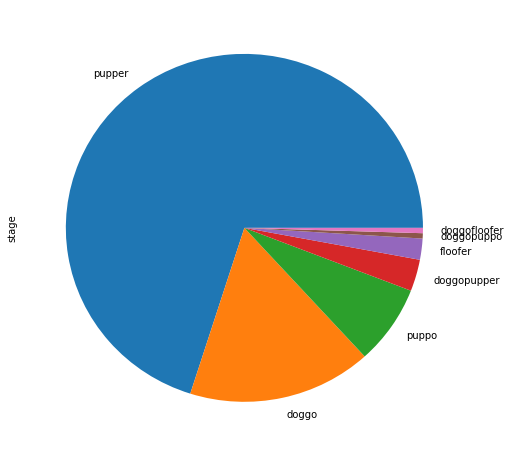

In [67]:
#Find out the proportion of each stage 
Final_master['stage'].value_counts().plot(kind= 'pie',figsize=(8,8));

In [68]:
#investigate the most popular dog name 
Final_master['name'].value_counts().head()

None       419
Oliver       8
Tucker       7
Winston      7
Lucy         6
Name: name, dtype: int64

Text(0,0.5,'retweet_count')

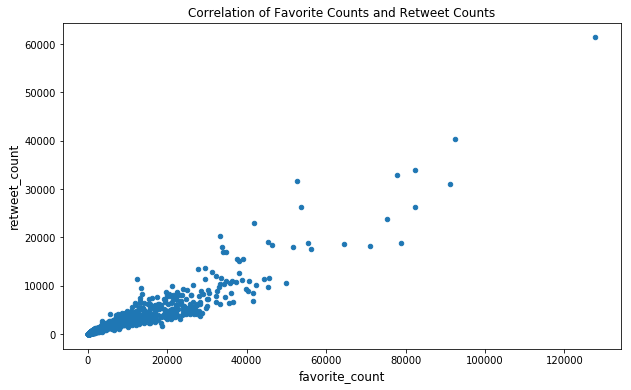

In [69]:
#show the relationship between Favorite counts and retweet counts 
Final_master.plot(x='favorite_count',y='retweet_count',kind='scatter',title = "Correlation of Favorite Counts and Retweet Counts",figsize=(10,6));
plt.xlabel('favorite_count', fontsize= 12)
plt.ylabel('retweet_count', fontsize= 12)

Text(0,0.5,'favorite_count')

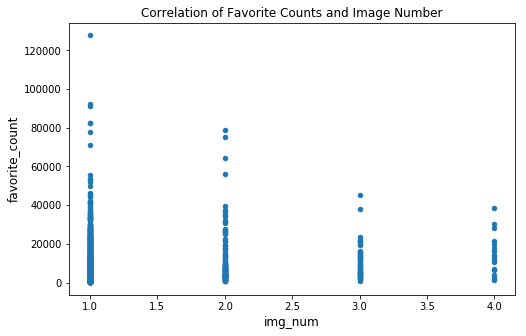

In [70]:
#show the relationship between Favorite counts and numbers of image
Final_master.plot(x='img_num',y='favorite_count',kind='scatter',title = "Correlation of Favorite Counts and Image Number",figsize=(8,5));
plt.xlabel('img_num', fontsize= 12)
plt.ylabel('favorite_count', fontsize= 12)

In [71]:
Final_master[Final_master['favorite_count'] == 127729]

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,full_text,retweet_count
232,807106840509214720,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,...,True,Pomeranian,0.120358,True,Toy Terrier,0.077008,True,127729,This is Stephan. He just wants to help. 13/10 ...,61375


## Insights:
- Among all the tweets in database, most tweets show dogs in pupper stage.
- Oliver, Tucker, Winston, and Penny are popular name for dog besides None.  
- The more people like the tweet, it would more likely to be retweeted.
- The less images people post on the tweet, the more favorite counts they would get.
- A dog named Stephan has most favorite count among other dogs in the database
